# Introduction to Data Science: a python approach to concepts techniques and applications
-Laura Igual & Santi Sequi

Working through this book and implementing the examples in p3

## Introduction to Data Science

**Datafication** the process of rendering into data aspects of the world that have never been quantified before.

**Democratization of Data Analysis** the recent availability of open analytic tools makes it possible for anyone to use rich data to take evidence-based decisions.

**Data Science** a methodology by which actionable insights can be inferred from data. ...The production of beliefs informaed by data and to be used as the basis of decision making. Data Science allows four different strategies to explore the world using data:

1. *Probing reality* the responce of the world to our actions. e.g. A/B testing for web development.
2. *Pattern discovery* discover useful patterns and natural clusters to simplify solutions.
3. *Predicting future events* allow decisions to be taken in response to future events, not only reactively.
4. *Understanding people and the world* natural language, computer vision, psychology and neuroscience.

**This book** demystify data science by describing a set of tools and techniques thatallows a person with basic skills in computer science, mathematics and statistics to perform the tasks commonly associated with data science.



## Toolboxes for Data Scienctists

**Fundamental Python Libraries**
1. *Numpy* support for multidimentional arrays
2. *SciPy* collections of algorithms and toolboxes for stats, signal processing, optimization etc.
3. *SCIKIT-Learn* machine learning library for classification, regression, model selection etc.
4. *PANDAS* dataframes & data analysis tools.
5. *Matplotlib* pretty pictures.


In [1]:
#import some libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#pandas data.frames
#basically just like R data.frmaes. tabular structures with rows and columns
data = { 'year': [
    2010, 2011, 2012,
    2010, 2011, 2012,
    2010, 2011, 2012 ], 
       'team': [
           'FCBarcelona', 'FCBarcelona', 'FCBarcelona',
           'RMadrid', 'RMadrid', 'RMadrid',
           'VallenciaCF', 'VallenciaCF', 'ValenciaCF'],
       'wins': [30, 28, 32, 29, 32, 26, 21, 17, 19],
       'draws': [6, 7, 4, 5, 4, 7, 8, 19, 8],
       'losses': [2, 3, 2, 4, 2, 5, 9, 11, 11]}
football = pd.DataFrame( data, columns = [
    'year', 'team', 'wins', 'draws', 'losses'])
football

,year,team,wins,draws,losses
0,2010,FCBarcelona,30,6,2
1,2011,FCBarcelona,28,7,3
2,2012,FCBarcelona,32,4,2
3,2010,RMadrid,29,5,4
4,2011,RMadrid,32,4,2
5,2012,RMadrid,26,7,5
6,2010,VallenciaCF,21,8,9
7,2011,VallenciaCF,17,19,11
8,2012,ValenciaCF,19,8,11


In [3]:
#importing data from a .csv to a pandas dataframe
edu_url = 'https://raw.githubusercontent.com/DataScienceUB/introduction-datascience-python-book/master/files/ch02/educ_figdp_1_Data.csv'
edu_df = pd.read_csv( edu_url, 
                    na_values = ':',
                    usecols = ['TIME', 'GEO', 'Value'])

read_csv is much R method to do the same. other methods to import data: `read_excel()`, `read_table()`, `read_hdf()` and even a method to read from clipboard: `read_clipboard()`

In [4]:
edu_df.head( 5 )

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95


In [5]:
edu_df.tail( 4 )

,TIME,GEO,Value
380,2008,Finland,6.10
381,2009,Finland,6.81
382,2010,Finland,6.85
383,2011,Finland,6.76


In [6]:
#describe() works much like summary() in R:
edu_df.describe()

,TIME,Value
count,384.000000,361.000000
mean,2005.500000,5.203989
std,3.456556,1.021694
min,2000.000000,2.880000
25%,2002.750000,4.620000
50%,2005.500000,5.060000
75%,2008.250000,5.660000
max,2011.000000,8.810000


In [7]:
#selecting data
edu_df.loc[ 13:15, [ 'TIME', 'Value' ] ]
#iloc is really handy too

,TIME,Value
13,2001,4.99
14,2002,5.00
15,2003,5.04


In [8]:
#filtering data
len( edu_df[ edu_df[ 'Value' ] > 6.5 ] )

33

**The only safe way to tell if a value is missing in a DataFrame is by using the isnull() function**

In [9]:
len( edu_df[ edu_df[ "Value" ].isnull() ] )

23

Common Aggregation Functions: `count()`, `sum()`, `mean()`, `median()`, `min()`, `max()`, `prod()`, `std()`, `var()`

In [10]:
print( 'Pandas max fxn:', edu_df[ 'Value'].max() )
print( 'Python max fxn:', max( edu_df[ 'Value' ] ) )

Pandas max fxn: 8.81
Python max fxn: nan


In [11]:
#Applying Operations to values in rows/columns or rows&columns:
s = edu_df[ "Value" ]/100
s.head()

s = edu_df[ "Value" ].apply( np.sqrt )
s.head()

#in line functions
s = edu_df[ "Value" ].apply( lambda d: d**2 )
s.head()

0        NaN
1        NaN
2    25.0000
3    25.3009
4    24.5025
Name: Value, dtype: float64

In [12]:
#New Feature based on Old
edu_df[ "ValueNorm" ]= edu_df[ "Value" ]/edu_df[ "Value" ].max()
edu_df.tail()

,TIME,GEO,Value,ValueNorm
379,2007,Finland,5.90,0.669694
380,2008,Finland,6.10,0.692395
381,2009,Finland,6.81,0.772985
382,2010,Finland,6.85,0.777526
383,2011,Finland,6.76,0.767310


In [13]:
#removing features with drop()
edu_df.drop( [ 'ValueNorm' ], axis=1, inplace=True)
edu_df.head()

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95


In [14]:
#appending a row
edu_df_new = pd.DataFrame( { "TIME" : [ 2000 ] , "Value" : [ 5.00 ] , "GEO" : [ 'a' ] } )
edu_df = edu_df.append( edu_df_new, ignore_index =  True ) 
edu_df.tail()

,TIME,GEO,Value
380,2008,Finland,6.10
381,2009,Finland,6.81
382,2010,Finland,6.85
383,2011,Finland,6.76
384,2000,a,5.00


In [15]:
#remove the row
edu_df.drop( max( edu_df.index ), axis = 0, inplace = True )
edu_df.tail()

,TIME,GEO,Value
379,2007,Finland,5.90
380,2008,Finland,6.10
381,2009,Finland,6.81
382,2010,Finland,6.85
383,2011,Finland,6.76


In [16]:
#filtering NaN values
edu_dropNaN = edu_df.dropna( subset = [ "Value" ] )
edu_dropNaN.head()

,TIME,GEO,Value
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95
5,2005,European Union (28 countries),4.92
6,2006,European Union (28 countries),4.91


In [17]:
#sorting
edu_df.sort_values( by = 'Value', ascending = False, inplace = True )
edu_df.head()

,TIME,GEO,Value
130,2010,Denmark,8.81
131,2011,Denmark,8.75
129,2009,Denmark,8.74
121,2001,Denmark,8.44
122,2002,Denmark,8.44


In [18]:
#group by
group = edu_df[ [ "GEO", "Value" ] ].groupby( "GEO" ).mean( )
group.head( )

,Value
GEO,
Austria,5.618333
Belgium,6.189091
Bulgaria,4.093333
Cyprus,7.023333
Czech Republic,4.168333


In [19]:
#pivotting data
filtered_edu = edu_df[ edu_df[ "TIME" ] > 2005 ]
pivedu = pd.pivot_table( filtered_edu, values = "Value",
                       index = [ "GEO" ],
                       columns = [ "TIME" ] )
pivedu.head( )

TIME,2006,2007,2008,2009,2010,2011
GEO,,,,,,
Austria,5.40,5.33,5.47,5.98,5.91,5.80
Belgium,5.98,6.00,6.43,6.57,6.58,6.55
Bulgaria,4.04,3.88,4.44,4.58,4.10,3.82
Cyprus,7.02,6.95,7.45,7.98,7.92,7.87
Czech Republic,4.42,4.05,3.92,4.36,4.25,4.51


In [20]:
#ranking data
pivedu = pivedu.drop( [ "Euro area (13 countries)",
                       "Euro area (15 countries)",
                       "Euro area (17 countries)",
                       "Euro area (18 countries)",
                       "European Union (25 countries)",
                       "European Union (27 countries)",
                       "European Union (28 countries)" ], axis = 0)
pivedu = pivedu.rename( index = { "Germany (until 1990 former territory of the FRG)" : "Germany" })
pivedu = pivedu.dropna()
pivedu.rank( ascending = False, method = "first").head()

TIME,2006,2007,2008,2009,2010,2011
GEO,,,,,,
Austria,10.0,7.0,11.0,7.0,8.0,8.0
Belgium,5.0,4.0,3.0,4.0,5.0,5.0
Bulgaria,21.0,21.0,20.0,20.0,22.0,22.0
Cyprus,2.0,2.0,2.0,2.0,2.0,3.0
Czech Republic,19.0,20.0,21.0,21.0,20.0,19.0


In [21]:
totalSum = pivedu.sum( axis = 1 )
totalSum.rank( ascending = False, method = "dense" ).sort_values().head()

GEO
Denmark    1.0
Cyprus     2.0
Finland    3.0
Malta      4.0
Belgium    5.0
dtype: float64

Some basic plots.....

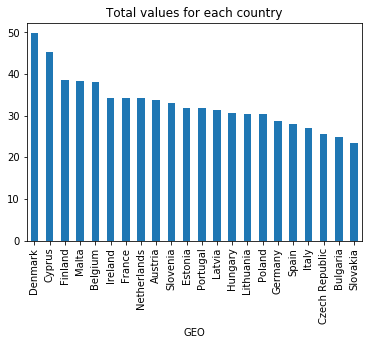

In [22]:
totalSum = pivedu.sum( axis = 1 ).sort_values( ascending = False )
totalSum.plot( kind = 'bar', style = 'b', title = "Total values for each country")

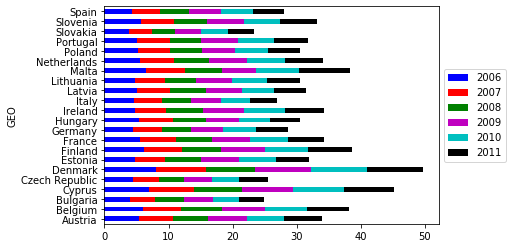

In [23]:
my_colors = [ "b", "r", "g", "m","c", "k" ]
ax = pivedu.plot( kind = "barh", stacked = True, color = my_colors )
ax.legend( loc = "center left", bbox_to_anchor = (1, 0.5))

## Descriptive Statistics

Descriptive statistics do not draw conclusions beyond what is being analyzed.
Descriptive statistics describe and summarize the data concisely and evaluate different ways to visualize them.

But first, data preparation:
1. *Obtaining the data*
2. *Parsing the Data*
3. *Cleaning the Data*
4. *Building data Structures*

An example with 'Adult' from UCI's [Machine Learning Repo](https://archive.ics.uci.edu/ml/datasets/Adult)

In [24]:
#Obtain the data
textbooksGitURL = "https://raw.githubusercontent.com/DataScienceUB/introduction-datascience-python-book/master/files/ch03/adult.data"

adult_df = pd.read_csv( textbooksGitURL, sep=",", header=None)
adult_df = pd.DataFrame( adult_df )
adult_df.columns = ['age', 'type_employer', 'fnlwgt',
'education', 'education_num', 'marital', 'occupation', 'relationship', 'race',
'sex', 'capital_gain', 'capital_loss', 'hr_per_week', 'country', 'income']

adult_df.head()

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [25]:
adult_df.shape

(32561, 15)

In [26]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            32561 non-null  int64 
 1   type_employer  32561 non-null  object
 2   fnlwgt         32561 non-null  int64 
 3   education      32561 non-null  object
 4   education_num  32561 non-null  int64 
 5   marital        32561 non-null  object
 6   occupation     32561 non-null  object
 7   relationship   32561 non-null  object
 8   race           32561 non-null  object
 9   sex            32561 non-null  object
 10  capital_gain   32561 non-null  int64 
 11  capital_loss   32561 non-null  int64 
 12  hr_per_week    32561 non-null  int64 
 13  country        32561 non-null  object
 14  income         32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [27]:
#count the number of items per country
counts = adult_df.groupby( 'country' ).size( )
print( counts.head( ) )

country
 ?           583
 Cambodia     19
 Canada      121
 China        75
 Columbia     59
dtype: int64


The *sample distribution* of the data can be used to approximate the *population distribution*

####  Proportion

In [28]:
countsIncome = adult_df.groupby( 'income' ).size( )
print( countsIncome )

income
 <=50K    24720
 >50K      7841
dtype: int64


In [29]:
countsGender = adult_df.groupby( 'sex' ).size( )
print( countsGender.head( ) )

sex
 Female    10771
 Male      21790
dtype: int64


In [30]:
countsGenIncome = adult_df.groupby( ['sex', 'income'] ).size( )
print( countsGenIncome )

sex      income
 Female   <=50K     9592
          >50K      1179
 Male     <=50K    15128
          >50K      6662
dtype: int64


In [31]:
print( 'The proportion of female high earners: ', countsGenIncome[1]/countsGender[0]*100 )
print( 'The proportion of male high earners: ', countsGenIncome[3]/countsGender[1]*100 )   
print( 'The population proportion of high earners: ', countsIncome[1]/( countsIncome[0] + countsIncome[1])*100)

The proportion of female high earners:  10.946058861758425
The proportion of male high earners:  30.573657641119777
The population proportion of high earners:  24.080955744602438


In [32]:
adult_df.groupby(['sex'])['age'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,10771.0,36.858230,14.013697,17.0,25.0,35.0,46.0,90.0
Male,21790.0,39.433547,13.370630,17.0,29.0,38.0,48.0,90.0


### Exploratory Data Analysis

#### Summarizing the Data
**Categorical Data:** simple tabulation of frequncy is best non-graphical rep. ex: proportions of a category
**Quantitative Data:** exploratory data analysis is a way to make preliminary assessments about the populatio distribution of a variable.

The characteristics of our randomly observed samples are interesting only to the degree that they represent the population of the data they came from.

#### Mean
the sum of the values divided by the number of values

$$\mu = \frac{1}{n}\sum_{i = 1}^{n} x_i$$

In [33]:
genderAgeStats = pd.DataFrame( adult_df.groupby(['sex'])['age'].describe() )
print( 'The average age of men is: ', genderAgeStats['mean'][1])
print( 'The average age of women is: ', genderAgeStats['mean'][0])
genderAgeStats

The average age of men is:  39.43354749885268
The average age of women is:  36.85823043357163


,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,10771.0,36.858230,14.013697,17.0,25.0,35.0,46.0,90.0
Male,21790.0,39.433547,13.370630,17.0,29.0,38.0,48.0,90.0


In [34]:
genderIncomeAgeStats = pd.DataFrame( adult_df.groupby(['sex','income'])['age'].describe() )
print( 'The average age of men is: ', genderIncomeAgeStats['mean'][3])
print( 'The average age of women is: ', genderIncomeAgeStats['mean'][1])
genderIncomeAgeStats

The average age of men is:  44.62578805163614
The average age of women is:  42.125530110262936


count       mean        std   min   25%   50%   75%   max
sex     income                                                             
 Female  <=50K   9592.0  36.210801  14.256801  17.0  24.0  34.0  46.0  90.0
         >50K    1179.0  42.125530  10.460104  19.0  34.0  41.0  49.0  90.0
 Male    <=50K  15128.0  37.147012  13.856113  17.0  26.0  35.0  46.0  90.0
         >50K    6662.0  44.625788  10.485469  19.0  37.0  44.0  51.0  90.0

#### Sample Variance
the variance describes the spread of the data. the variance is the mean squared deviation. the square root of the variance is the standard deviation.

$$\sigma^{n} = \frac{1}{n}\sum_{i} (x_i-\mu)^2$$

here we will consider the standard deviation because it is easier to interpret

In [35]:
print( 'Statistics of age for women: \nmu: ', genderAgeStats['mean'][0],
     '\nvar: ', genderAgeStats['std'][0]**2,
     '\nstd: ', genderAgeStats['std'][0],
      '\nStatistics of age for men: \nmu: ', genderAgeStats['mean'][1],
     '\nvar: ', genderAgeStats['std'][1]**2,
     '\nstd: ', genderAgeStats['std'][1])

Statistics of age for women: 
mu:  36.85823043357163 
var:  196.38370639480374 
std:  14.01369709943824 
Statistics of age for men: 
mu:  39.43354749885268 
var:  178.77375174530096 
std:  13.37063019252649


#### Median, Quantiles & Percents


In [36]:
print( 'Median age for men and women: ', genderAgeStats['50%'][1], ', ', genderAgeStats['50%'][0])
print( 'Median age for men and women with high income: ', genderIncomeAgeStats['50%'][3], 
      ', ', genderIncomeAgeStats['50%'][1])

Median age for men and women:  38.0 ,  35.0
Median age for men and women with high income:  44.0 ,  41.0


In [37]:
print( 'The IQR for men and women: ', (genderAgeStats['75%'][1]-genderAgeStats['25%'][1]),
     ', ', (genderAgeStats['75%'][0]-genderAgeStats['25%'][0]),
     '\nThe IQR for men and women with high income: ', 
      (genderIncomeAgeStats['75%'][3]-genderIncomeAgeStats['25%'][3]), ', ',
      (genderIncomeAgeStats['75%'][1]-genderIncomeAgeStats['25%'][1]))

The IQR for men and women:  19.0 ,  21.0 
The IQR for men and women with high income:  14.0 ,  15.0


#### Data Distributions



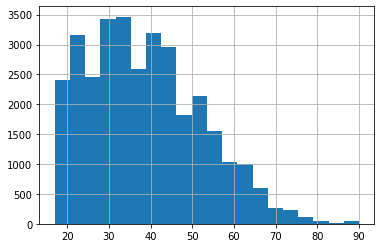

In [38]:
adult_df['age'].hist( density = 0, histtype = 'stepfilled', bins = 20 )

### linkyLinkLinks
https://github.com/DataScienceUB/introduction-datascience-python-book

In [39]:
file = open( '/home/bonzilla/Desktop/ReadingLearningTinkering/adult_data.txt' )

def chr_int( a ):
    if a.isdigit(): return int( a )
    else: return 0

data = []

for line in file:
    data1 = line.split(', ')
    if len( data1 ) == 15:
        data.append( [chr_int( data1[0]), data1[1],
                     chr_int( data1[2]), data1[3],
                     chr_int( data1[4]), data1[5],
                     data1[6], data1[7], data1[8],
                     data1[9], chr_int( data1[10]),
                     chr_int(data1[11]), chr_int(data1[12]),
                     data1[13], data1[14]])

In [40]:
print(data[1:2])
df = pd.DataFrame( data )
df.columns = ['age' , 'type_employer' , 'fnlwgt' ,
 'education', 'education_num', 'marital',
'occupation' , 'relationship' , 'race' ,
'sex' , 'capital_gain' , 'capital_loss' ,
'hr_per_week', 'country', 'income']

[[50, 'Self-emp-not-inc', 83311, 'Bachelors', 13, 'Married-civ-spouse', 'Exec-managerial', 'Husband', 'White', 'Male', 0, 0, 13, 'United-States', '<=50K\n']]


In [41]:
males = df[( df.sex == 'Male') ]
females = df[( df.sex == 'Female')]

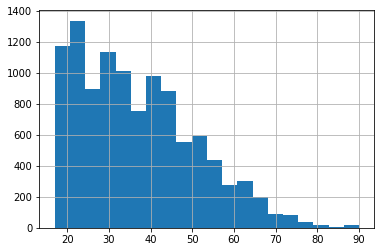

In [43]:
female_ages = females['age']
female_ages.hist( histtype='stepfilled', bins=20)

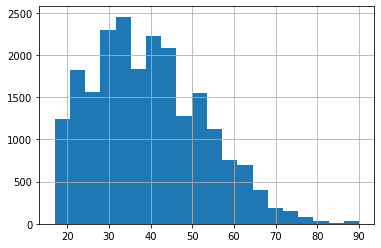

In [44]:
male_ages = males['age']
male_ages.hist( histtype='stepfilled', bins=20)

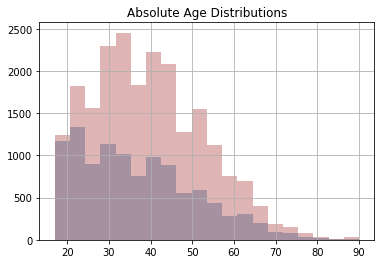

In [48]:
import seaborn as sns
female_ages.hist( alpha=0.5, histtype='stepfilled', bins=20).set_title('Absolute Age Distributions')
male_ages.hist( alpha=0.5, histtype='stepfilled', bins=20, color=sns.desaturate("indianred",0.75))

**Normalization** the above histogram shows that there are many more men sampled than women. However, it is not a very informative figure for understanding the differences of age distributions between the 2 genders. The next figure normalizes for the number of samples in each group with the matplotlib `hist` argument, `density`.

`density` normalizes the bin counts to give a probability density.

**Probability Density Distribution** the cumulative sum of the bins == 1. 

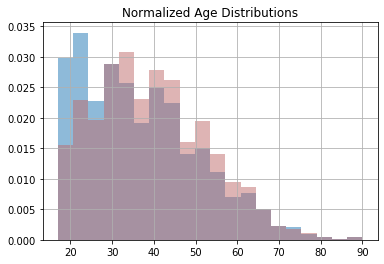

In [51]:
female_ages.hist( density=1, alpha=0.5, histtype='stepfilled', bins=20).set_title('Normalized Age Distributions')
male_ages.hist( density=1, alpha=0.5, histtype='stepfilled', bins=20, color=sns.desaturate("indianred",0.75))

**Cumulative Distribution Fxn** a figure that describes the probability that a real-valued random variable $X$ with a given probability distribution will be found to have a value less than or equal to $x$. 

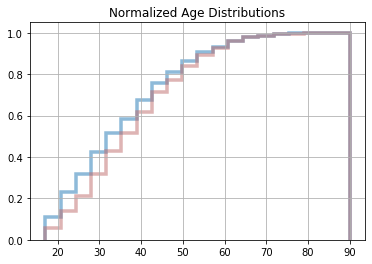

In [54]:
female_ages.hist( density=1, alpha=0.5, histtype='step', 
                 bins=20, cumulative=1, linewidth=3.5).set_title('Normalized Age Distributions')
male_ages.hist( density=1, alpha=0.5, histtype='step', bins=20, 
               color=sns.desaturate("indianred",0.75), cumulative=1, linewidth=3.5)

#### Outlier Treatment

1. Samples that are far from the median
2. Samples that exceed the mean by 2 or 3 standard deviations

In [58]:
df_filtered = df.drop( df.index[
    (df.income == '>50K\n') &
    (df['age'] > df['age'].median()+35) &
    (df['age'] > df['age'].median()-15)])

print( df_filtered.size)
print( df.size)

487380
488415


In [59]:
filt_males = df_filtered[( df_filtered.sex == 'Male') ]
filt_females = df_filtered[( df_filtered.sex == 'Female')]
fm_age = filt_males['age']
ff_age = filt_females['age']

In [62]:
print( 'Female Age Stats before filtering: ')
female_ages.describe()

Female Age Stats before filtering: 


count    10771.000000
mean        36.858230
std         14.013697
min         17.000000
25%         25.000000
50%         35.000000
75%         46.000000
max         90.000000
Name: age, dtype: float64

In [63]:
print( '\nFemale Age Stats After filtering:')
ff_age.describe()


Female Age Stats After filtering:


count    10763.000000
mean        36.827279
std         13.971564
min         17.000000
25%         25.000000
50%         35.000000
75%         46.000000
max         90.000000
Name: age, dtype: float64

In [64]:
print( 'Male Age Stats before filtering: ')
male_ages.describe()

Male Age Stats before filtering: 


count    21790.000000
mean        39.433547
std         13.370630
min         17.000000
25%         29.000000
50%         38.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [65]:
print( 'Male Age Stats after filtering: ')
fm_age.describe()

Male Age Stats after filtering: 


count    21729.000000
mean        39.325464
std         13.230138
min         17.000000
25%         29.000000
50%         38.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

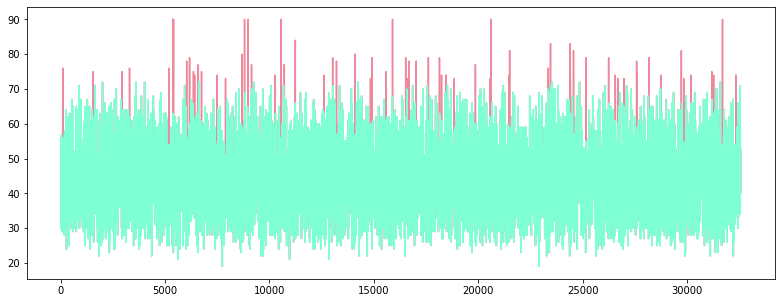

In [71]:
#Visualizing the Outliers that were removed
plt.figure(figsize = (13.4, 5))
df.age[(df.income == ">50K\n")].plot(alpha=0.5, color='crimson')
df_filtered.age[(df_filtered.income == ">50K\n")].plot(alpha=1, color='aquamarine')

In [74]:
print( 'The mean difference with outliers: ', round(male_ages.mean()-female_ages.mean(),3))
print( '\nThe mean difference without outliers: ', round(fm_age.mean()-ff_age.mean(),3))

The mean difference with outliers:  2.575

The mean difference without outliers:  2.498


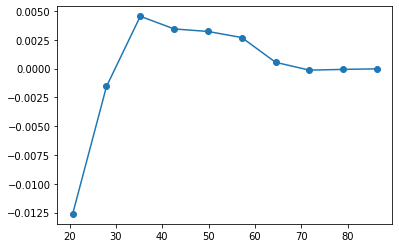

In [78]:
countx, divisionx = np.histogram( fm_age, density=1)
county, divisiony = np.histogram( ff_age, density=1)

val = [(divisionx[i] + divisionx[i+1])/2
      for i in range(len(divisionx)-1)]

plt.plot(val, countx - county, 'o-')

#### Measuring Asymmetry: skewness and Pearson's median skewness coef.

measureing the asymmetry in a set of univariate data:
$$g_1 = \frac{1}{n}\frac{\sum_{i} (x_i-\mu^3)}{\sigma^3}$$

In [81]:
def skewness(x):
    res = 0
    m = x.mean()
    s = x.std()
    for i in x:
        res += (i-m)*(i-m)*(i-m)
    res /= (len(x)*s*s*s)
    return res

In [83]:
print('Skewness of male sample: ', skewness( male_ages ),
     '\nSkewness of female sample: ', skewness( female_ages ))

Skewness of male sample:  0.5197695091628508 
Skewness of female sample:  0.6787226057767358


In [84]:
def pearson( x ):
    return 3*( x.mean() - x.median())*x.std()

In [85]:
print('Pearsons coef. of male sample: ', pearson( male_ages ),
     '\nPearsons coef. of female sample: ', pearson( female_ages ))

Pearsons coef. of male sample:  57.50230041174153 
Pearsons coef. of female sample:  78.12203531109172


#### Kernal Density Estimation

estimating the continuous representation of a distribution. e.g. a Gaussian kernal.  
if we consider a Gaussian kernal around the data, the sum of those kernals can give us a continuous function that when normalized would approximate the density of the distribution

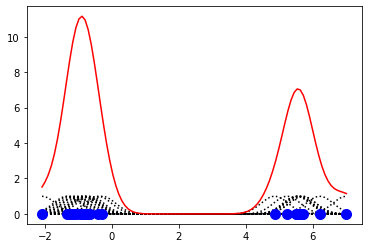

In [87]:
from scipy.stats import norm

x1 = np.random.normal( -1, 0.5, 15 )
x2 = np.random.normal( 6, 1, 10 )
y = np.r_[ x1, x2 ]
x = np.linspace( min(y), max(y), 100 )
s = 0.4

kernels = np.transpose([ norm.pdf( x, yi, s ) for yi in y ])

plt.plot( x, kernels, 'k:' )
plt.plot( x, kernels.sum( 1 ), 'r' )
plt.plot( y, np.zeros( len( y ) ), 'bo', ms =10 )

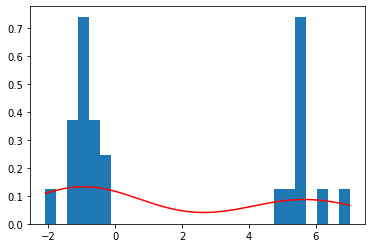

In [96]:
from scipy.stats import kde
density = kde.gaussian_kde( y )
xgrid = np.linspace( x.min(), x.max(), 200)
plt.hist( y, bins = 28, density = True )
plt.plot( xgrid, density( xgrid ), 'r-' )

#### Estimation 

using estimates to approximate the values of unknown parameters of the dataset.
**point estimates** single numerical estimates of parameters of a population

##### Mean
if there are no outliers, the sample mean minimizes the Mean Squared Error.

**Mean Squared Error** : the average of the squares of the differences between the observed and the actual data
$$MSE =  \frac{1}{n}\sum (\overline{x}-\mu)^2 $$


In [99]:
NTs = 200
mu = 0.0
var = 1.0
err = 0.0
NPs = 1000
for i in range( NTs ):
    x = np.random.normal( mu, var, NPs )
    err += ( x.mean() -mu)**2
print( 'MSE: ', err/NTs )   

MSE:  0.0009303859619157839


##### Variance

$$\overline{\sigma}^2 =  \frac{1}{n}\sum (x_i - \overline{x})^2 $$

##### Standard Score

$$z_i=  \frac{(x_i - \mu)}{\sigma}$$

##### Corvariance
two variables, $X$ & $Y$, share the same tendecy

$$Cov(X, Y) =  \frac{1}{n}\sum^{n}_{i=1}dx_idy_i$$

##### Pearson's Correlation
normaliza the data with respect to their deviation ... multiplying the standard scores.

$$\rho = \frac{x_i - \mu_X}{\sigma_X}\frac{y_i - \mu_Y}{\sigma_Y} = \frac{Cov(X, Y)}{\sigma_X\sigma_Y}$$

Pearson's correlation is always between -1 and +1, where the magnitude depends on the degree of correlation (+ or -), it means that the variable can predict the other very well. However, having a $rho$=0, does not necessarily mean the variables are not correlated (Pearson's is not robust to nonlinear correlations). 

##### Spearman's Rank Correlation
use the ranks of the sorted sample data. is robust to outliers unline Pearson's.

## Statistical Inference
